In [90]:
from utils.data_loaders import load_instagram_data
import seaborn as sns

In [2]:
es = load_instagram_data(data_dir="Data")

In [3]:
es

Entityset: entityset
  Entities:
    ad_account [Rows: 110, Columns: 60]
    campaign [Rows: 255, Columns: 28]
    ad_set [Rows: 339, Columns: 65]
    ad [Rows: 397, Columns: 24]
    insight [Rows: 407, Columns: 64]
    creative [Rows: 399, Columns: 41]
    video [Rows: 200, Columns: 20]
    image [Rows: 200, Columns: 5]
  Relationships:
    campaign.account_id -> ad_account.id
    ad_set.campaign_id -> campaign.id
    ad.adset_id -> ad_set.id
    insight.ad_id -> ad.id
    creative.ad_id -> ad.id
    video.creative_id -> creative.id
    image.creative_id -> creative.id

In [7]:
es.plot("er.png")

NameError: name 'pd' is not defined

In [8]:
import pandas as pd

In [20]:
ad = pd.read_csv("Data/ad.csv")

In [21]:
creative = pd.read_csv("Data/creative.csv")

In [24]:
set(creative["id"]) - set(ad["creative_id"])

{23843604991530035, 23843892664200533}

In [25]:
insight = pd.read_csv("Data/insight.csv")

In [45]:
insight.groupby("ad_id").count().query("account_currency > 1")

,account_currency,account_id,account_name,ad_name,adset_id,adset_name,buying_type,campaign_id,campaign_name,canvas_avg_view_percent,...,actions,video_30_sec_watched_actions,video_avg_time_watched_actions,video_p25_watched_actions,video_3s_view,db_inserted_time,db_updated_time,publisher_platform,platform_position,device_platform
ad_id,,,,,,,,,,,,,,,,,,,,,
6111556937979,2,2,2,2,2,2,2,2,2,0,...,2,0,0,0,0,2,2,2,2,2
6130005408926,2,2,2,2,2,2,2,2,2,0,...,2,0,0,0,0,2,2,2,2,2
23843142153180247,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,0,2,2,2,2,2
23843142170590247,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,0,2,2,2,2,2
23843222041540367,2,2,2,2,2,2,2,2,2,0,...,1,0,0,0,0,2,2,2,2,2
23843230339810518,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,0,2,2,2,2,2
23843247425780675,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,0,2,2,2,2,2
23843253376330711,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,0,2,2,2,2,2
23843321589890662,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,0,2,2,2,2,2


In [32]:
insight.query("ad_id == 6111556937979")

,ad_id,account_currency,account_id,account_name,ad_name,adset_id,adset_name,buying_type,campaign_id,campaign_name,...,actions,video_30_sec_watched_actions,video_avg_time_watched_actions,video_p25_watched_actions,video_3s_view,db_inserted_time,db_updated_time,publisher_platform,platform_position,device_platform
45,6111556937979,JPY,710359735732704,"ACOM Co., Ltd._DD",acom_saitan_1200x1200 - Image 2,6111556439779,RM_Instagram,AUCTION,6062859532179,アコム_申込みCV_RT _2017,...,[{'action_type': 'offsite_conversion.fb_pixel_...,NaN,NaN,NaN,NaN,2019-12-02 04:52:18,2019-12-02 04:52:18,instagram,instagram_stories,mobile
46,6111556937979,JPY,710359735732704,"ACOM Co., Ltd._DD",acom_saitan_1200x1200 - Image 2,6111556439779,RM_Instagram,AUCTION,6062859532179,アコム_申込みCV_RT _2017,...,"[{'action_type': 'landing_page_view', 'value':...",NaN,NaN,NaN,NaN,2019-12-02 04:52:18,2019-12-02 04:52:18,instagram,instagram_stories,mobile_app


In [40]:
es["video"].df["creative_id"].unique().shape


(199,)

In [52]:
len(set(es["creative"].df["id"]) & set(es["video"].df["creative_id"].unique()))

199

$$c = \sqrt{a^2 + b^2}$$

In [85]:
es["ad_account"]

Entity: ad_account
  Variables:
    id (dtype: index)
    account_status (dtype: numeric)
    name (dtype: categorical)
    owner (dtype: numeric)
    age (dtype: numeric)
    agency_client_declaration (dtype: categorical)
    amount_spent (dtype: numeric)
    attribution_spec (dtype: text)
    balance (dtype: numeric)
    business (dtype: text)
    business_city (dtype: categorical)
    business_country_code (dtype: categorical)
    business_name (dtype: categorical)
    business_state (dtype: categorical)
    business_street (dtype: categorical)
    business_street2 (dtype: numeric)
    business_zip (dtype: numeric)
    can_create_brand_lift_study (dtype: numeric)
    capabilities (dtype: numeric)
    created_time (dtype: datetime)
    currency (dtype: categorical)
    disable_reason (dtype: numeric)
    end_advertiser (dtype: numeric)
    is_direct_deals_enabled (dtype: numeric)
    is_in_3ds_authorization_enabled_market (dtype: numeric)
    is_in_middle_of_local_entity_migration (d

In [84]:
es["ad_account"].df.head().iloc[:, 50:60]

,funding_source_details,rf_spec,tos_accepted,industry_id,industry_name_large,industry_name_medium,industry_name_small,db_inserted_time,db_updated_time,rec_status
101474203315437,None,NaN,"{'web_custom_audience_tos': 1, 'custom_audienc...",NaN,NaN,NaN,NaN,2019-11-19 09:58:18,2019-12-18 15:00:06,3
103584809830089,None,NaN,"{'web_custom_audience_tos': 1, 'custom_audienc...",NaN,NaN,NaN,NaN,2019-11-19 09:55:56,2019-12-18 15:00:06,3
105127429601931,None,NaN,"{'web_custom_audience_tos': 1, 'custom_audienc...",NaN,NaN,NaN,NaN,2019-11-19 09:52:15,2019-12-18 15:00:06,3
107523299420494,None,NaN,"{'web_custom_audience_tos': 1, 'custom_audienc...",NaN,NaN,NaN,NaN,2019-11-19 09:53:56,2019-12-18 15:00:06,3
142977109919742,None,NaN,"{'web_custom_audience_tos': 1, 'custom_audienc...",NaN,NaN,NaN,NaN,2019-11-19 09:50:40,2019-12-18 15:00:06,3


In [89]:
sns

array([2834.27  , 2448.93  , 2931.19  , 2519.13  ,  145.007 , 1699.37  ,
        508.117 ,  368.191 ,  363.288 ,  455.924 ,  378.341 ,  161.104 ,
        497.372 ,  145.99  ,  146.198 ,  333.996 ,  125.1   ,   82.0799,
        113.061 ,  347.023 ,  297.977 ,  173.183 , 1876.03  ,  246.137 ,
        161.396 ,  144.312 ,  230.107 ,  140.13  ,  382.366 ,   49.2873,
        147.139 ,  126.056 ,  162.016 ,   59.9647, 1824.85  , 1796.04  ,
        299.074 , 1754.97  , 1356.15  , 1639.37  , 1694.86  ,  302.133 ,
       1677.05  , 1534.22  , 1635.22  ,  152.287 , 1426.36  , 1586.08  ,
        488.225 , 1483.04  , 1460.38  , 1440.3   , 1449.13  , 1449.33  ,
        133.015 , 1393.26  , 1378.32  , 1376.21  ,  145.326 , 1363.28  ,
         30.1255, 1344.13  ,  238.879 ,  141.151 , 1163.15  , 1285.01  ,
       1162.87  , 1155.02  , 1146.2   ,  356.375 ,  111.198 , 1092.22  ,
       1093.25  , 1014.22  ,  148.16  ,  943.028 ,  942.282 ,  941.856 ,
        936.198 ,  917.148 ,  902.061 ,  880.196 , 

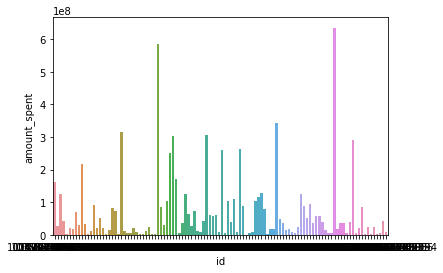

In [91]:
sns.barplot(x="id", y="amount_spent", data=es["ad_account"].df)

In [93]:
es["ad_account"].df.to_dict("r")

[{'id': 101474203315437,
  'account_status': 1,
  'name': 'coca_cola_DD_Coca',
  'owner': 550011445100868,
  'age': 2834.27,
  'agency_client_declaration': 'None',
  'amount_spent': 162187598,
  'attribution_spec': "[{'event_type': 'CLICK_THROUGH', 'window_days': 28}, {'event_type': 'VIEW_THROUGH', 'window_days': 1}]",
  'balance': 0,
  'business': "{'id': '550011445100868', 'name': 'サイバー・コミュニケーションズ'}",
  'business_city': nan,
  'business_country_code': 'JP',
  'business_name': nan,
  'business_state': nan,
  'business_street': nan,
  'business_street2': nan,
  'business_zip': nan,
  'can_create_brand_lift_study': 0,
  'capabilities': nan,
  'created_time': Timestamp('2012-02-03 16:52:00'),
  'currency': 'JPY',
  'disable_reason': 0,
  'end_advertiser': nan,
  'is_direct_deals_enabled': 0,
  'is_in_3ds_authorization_enabled_market': 0,
  'is_in_middle_of_local_entity_migration': 0,
  'is_personal': 2,
  'is_prepay_account': 0,
  'is_tax_id_required': 0,
  'min_daily_budget': 101.0,
  '